Chris Hanson
DSCI 552
Homework #1
September 18, 2020

In [28]:
cd ../vertebral_column_data

C:\Users\chans\Google Drive\Masters Program\DSCI 552\Assignments\HW1\homework-1-chrishanson\vertebral_column_data


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from scipy.io import arff
from scipy import misc
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#Load the data into a Pandas DataFrame
data1 = arff.loadarff('column_2C_weka.arff')
df1 = pd.DataFrame(data1[0])

In [31]:
#replace "Abormal" with 1 and "Normal" with 0 in the DataFrame
df1 = df1.replace(to_replace=b'Abnormal', value=1 )
df1 = df1.replace(to_replace=b'Normal', value=0 )

(b) i. Make scatterplots of the independent variables in the dataset.

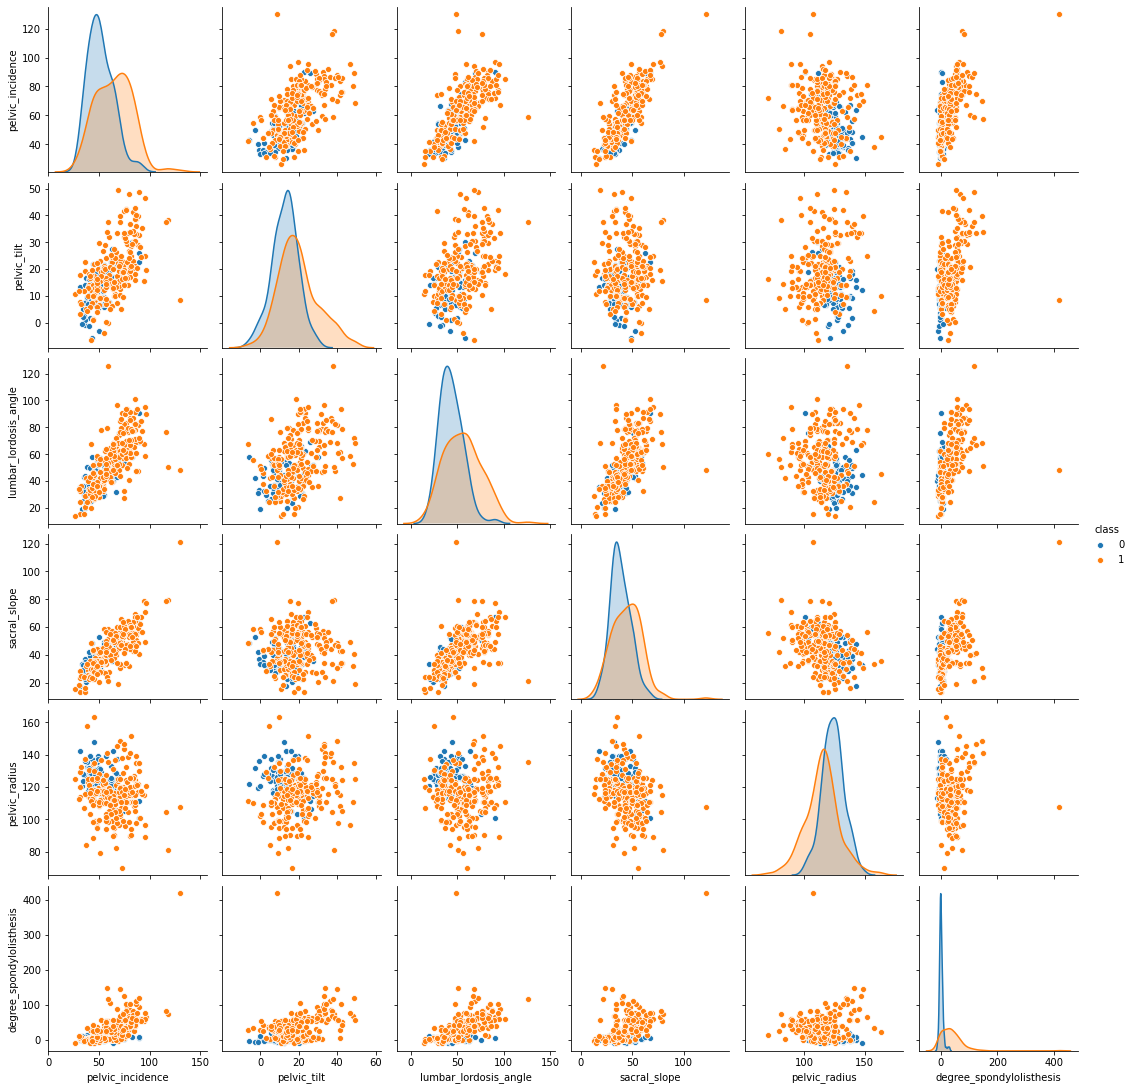

In [32]:
sns.pairplot(df1, hue='class')

(b) ii. Make boxplots for each of the independent variables.

Boxplots for Class 1:

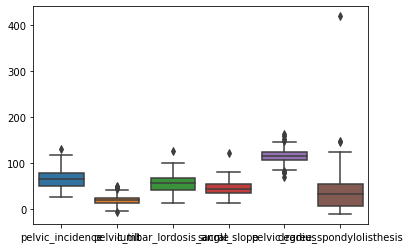

In [33]:
df1_C1 = df1.loc[df1["class"] == 1]
df1_C0 = df1.loc[df1["class"] == 0]
df1_C1 = df1_C1.drop(columns=['class'])
df1_C0 = df1_C0.drop(columns=['class'])
sns.boxplot(data = df1_C1)

Boxplots for Class 0:

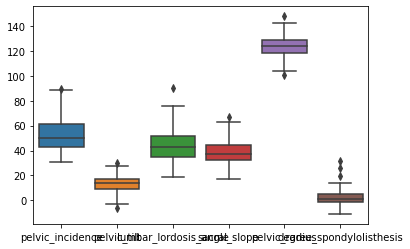

In [34]:
sns.boxplot(data = df1_C0)

(b) iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [35]:
training_df1_1 = df1.loc[df1["class"] == 1]
training_df1_1 = training_df1_1[0:140]
training_df1_0 = df1.loc[df1["class"] == 0]
training_df1_0 = training_df1_0[0:70]
testing_df1_1 = df1.loc[df1["class"] == 1]
testing_df1_1 = testing_df1_1[140:]
testing_df1_0 = df1.loc[df1["class"] == 0]
training_df1 = pd.concat([training_df1_1, training_df1_0], axis=0)
testing_df1 = pd.concat([testing_df1_1, testing_df1_0], axis=0)
#dropping the "class" column from the training dataframe
X_train = training_df1.drop(columns=['class'])
#pulling out the "class" column from the training data
y_train = training_df1['class'].values
#dropping the "class" column from the testing dataframe
X_test = testing_df1.drop(columns=['class'])
#pulling out the "class" column from the testing data
y_test = testing_df1['class'].values

(c) i. Write code from k-nearest neighbors with Euclidean metric (or use a software package).
    ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. 

In [36]:
#fit the KNN model, p=2 means power parameter for Minkowski metric is euclidean distance
#Default weight is uniform, ie "Majority polling," and I chose a random K to test
SpineKNN = KNeighborsClassifier(n_neighbors=10, p=2)
SpineKNN.fit(X_train,y_train)
#use the KNN model against our test data
SpineKNN.predict(X_test)
#check accuracy of our model on the test data
SpineKNN.score(X_test, y_test)

0.8529411764705882

(c) ii. Plot train and test errors in terms of k for k = (208; 205; : : : ; 7; 4; 1;) (in reverse order).

Text(0, 0.5, 'Error against test data')

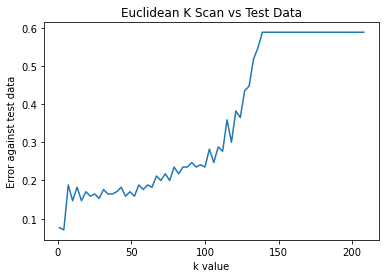

In [37]:
#Plot test errors 
k_values = np.arange(208,-2,-3)
k_test_output = []
for Q in k_values:
    SpineKNN_Scan = KNeighborsClassifier(n_neighbors=Q, p=2)
    SpineKNN_Scan.fit(X_train,y_train)
    z = SpineKNN_Scan.score(X_test, y_test)
    k_test_output.append(z)

k_test_output = [1 - x for x in k_test_output]
plt.plot(k_values, k_test_output)
plt.title('Euclidean K Scan vs Test Data')
plt.xlabel("k value")
plt.ylabel("Error against test data")

This shows that we estimate the test data most accurately when k = 4.

Text(0, 0.5, 'Error against training data')

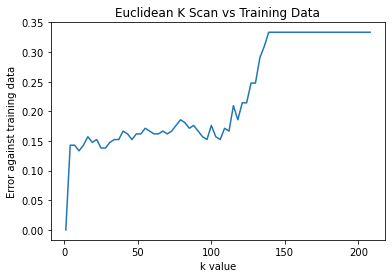

In [38]:
k_train_output = []
for Q in k_values:
    SpineKNN_Scan_tr = KNeighborsClassifier(n_neighbors=Q, p=2)
    SpineKNN_Scan_tr.fit(X_train,y_train)
    z = SpineKNN_Scan_tr.score(X_train, y_train)
    k_train_output.append(z)

k_train_output = [1 - x for x in k_train_output]
plt.plot(k_values, k_train_output)
plt.title('Euclidean K Scan vs Training Data')
plt.xlabel("k value")
plt.ylabel("Error against training data")

This shows that we estimate the training data most accurately when k = 1.

In [39]:
#fit the KNN model w/ k = 4, as this is the optimal k value
SpineKNN_4 = KNeighborsClassifier(n_neighbors=4, p=2)
SpineKNN_4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

Below is the confusion matrix

In [41]:
#get the k=4 predicted y values
y_test_predicted4 = SpineKNN_4.predict(X_test)
#calculate the confusion matrix: shape (n_classes, n_classes) - ith row and jth column, 
#so of 30 0's, 25 were correctly predicted, 5 weren't. of 70 1's, 69 were correctly predicted and 1 wasn't.
confusion_matrix(y_test, y_test_predicted4)

array([[89, 11],
       [ 1, 69]], dtype=int64)

Below is the True Positives

In [42]:
#'micro' calculates metrics globally by counting the total true positives, false negatives, and false positives
precision_score(y_test, y_test_predicted4, average='micro')

0.9294117647058824

Below I calculate the precision and F1 score when k = k* (k = 4)

In [43]:
Pre_F1 = classification_report(y_test, y_test_predicted4)
print(Pre_F1)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       100
           1       0.86      0.99      0.92        70

    accuracy                           0.93       170
   macro avg       0.93      0.94      0.93       170
weighted avg       0.94      0.93      0.93       170



(c) iii. Best test error rate.

In [44]:
N_values = np.arange(10,220,10) #creates an array for my N values - the size of the training set used
N_values = N_values.tolist() #changes my array to a list which is necessary but I don't know why
N_test_output = []
Nk_test_output = []
KN_test_output = []
for x in N_values:
    
    #Here I make my shortened training sets, from 10-210 total datapoints
    xx = 2*x/3
    xx = round(xx)
    XX = x/3
    XX = round(XX)
    X_train_short0 = X_train[140:140+XX]
    X_train_short1 = X_train[0:xx]
    X_train_short = pd.concat([X_train_short1, X_train_short0], axis=0)
    y_train_short0 = y_train[140:140+XX]
    y_train_short1 = y_train[0:xx]
    y_train_short = np.concatenate((y_train_short1, y_train_short0), axis=0)

    #Here is constant K=4 against a lengthening dataset, to get a "best test error rate"
    SpineKNN_4K = KNeighborsClassifier(n_neighbors=4, p=2)
    SpineKNN_4K.fit(X_train_short,y_train_short)
    SpineKNN_4K.predict(X_test)
    vv = SpineKNN_4K.score(X_test, y_test)
    N_test_output.append(vv)   
    
    #Here I run a scan of K values against each of my shortened training sets
    dd = len(y_train_short)
    Nk_values = np.arange(1,dd+1,5) #this stops K from exceeding N
    for QQ in Nk_values:    
        SpineKNN_N = KNeighborsClassifier(n_neighbors=QQ, p=2)
        SpineKNN_N.fit(X_train_short,y_train_short)
        SpineKNN_N.predict(X_test)
        zz = SpineKNN_N.score(X_test, y_test)
        Nk_test_output.append(zz)

Nk_test_output = [1 - x for x in Nk_test_output]
N_test_output = [1 - x for x in N_test_output]


Text(0, 0.5, 'Error of KNN against test data')

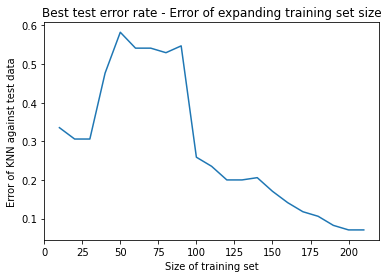

In [45]:
plt.plot(N_values, N_test_output)
plt.title('Best test error rate - Error of expanding training set size')
plt.xlabel("Size of training set")
plt.ylabel("Error of KNN against test data")

Text(0, 0.5, 'Error of KNN against test data')

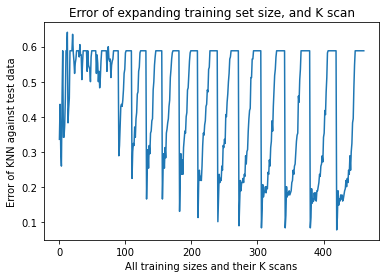

In [46]:
plt.plot(Nk_test_output)
plt.title('Error of expanding training set size, and K scan')
plt.xlabel("All training sizes and their K scans")
plt.ylabel("Error of KNN against test data")

Obviously this plot above is undesirable. I calculated the error of each of the variously sized training sets (from 10 to 210) in my code, and ran each of those KNN against a scan of K values (from 1 to N-4, in steps of 5), but I failed to figure out how to write my code to save each iteration of my loop in a separate array.

(d) i.

Text(0, 0.5, 'Error of KNN against test data')

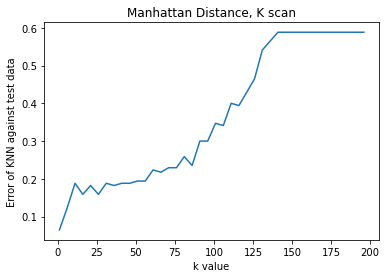

In [47]:
#Manhattan Distance with p = 1

k_values_D = np.arange(1,201,5)
k_test_output_D = []
for Q in k_values_D:
    SpineKNN_Scan_D = KNeighborsClassifier(n_neighbors=Q, p=1)
    SpineKNN_Scan_D.fit(X_train,y_train)
    z = SpineKNN_Scan_D.score(X_test, y_test)
    k_test_output_D.append(z)


k_test_output_D = [1 - x for x in k_test_output_D]
plt.plot(k_values_D, k_test_output_D)
plt.title('Manhattan Distance, K scan')
plt.xlabel("k value")
plt.ylabel("Error of KNN against test data")
#thus, k* = 1

Text(0, 0.5, 'Error of KNN against test data')

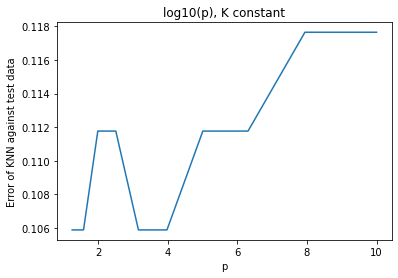

In [48]:
#part diB) - log base 10 (p) is a member of the set 0.1, 0.2 ... 1. Use k*. 
pp = np.arange(0.1,1.1,0.1)
p = 10**pp
k_test_output_DP = []
for Q in p:
    SpineKNN_Scan_DP = KNeighborsClassifier(n_neighbors=6, p=Q)
    SpineKNN_Scan_DP.fit(X_train,y_train)
    z = SpineKNN_Scan_DP.score(X_test, y_test)
    k_test_output_DP.append(z)
#print(k_test_output_DP)

k_test_output_DP = [1 - x for x in k_test_output_DP]
plt.plot(p, k_test_output_DP)
plt.title('log10(p), K constant')
plt.xlabel("p")
plt.ylabel("Error of KNN against test data")
#The best log10(p) is 0.6

Text(0, 0.5, 'Error of KNN against test data')

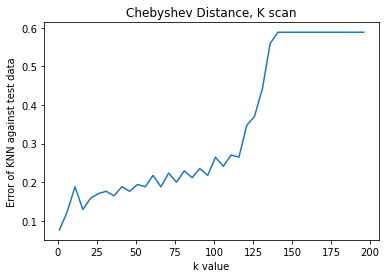

In [49]:
#part diC) Chebyshev distance

#Select the best k when {1, 6, 11, ..., 196}
k_values_DC = np.arange(1,201,5)
k_test_output_DC = []
for Q in k_values_DC:
    SpineKNN_Scan_DC = KNeighborsClassifier(n_neighbors=Q, metric = 'chebyshev')
    SpineKNN_Scan_DC.fit(X_train,y_train)
    z = SpineKNN_Scan_DC.score(X_test, y_test)
    k_test_output_DC.append(z)
#print(k_test_output_DC)

k_test_output_DC = [1 - x for x in k_test_output_DC]
plt.plot(k_values_DC, k_test_output_DC)
plt.title('Chebyshev Distance, K scan')
plt.xlabel("k value")
plt.ylabel("Error of KNN against test data")
#thus, k* = 1

Text(0, 0.5, 'Error of KNN against test data')

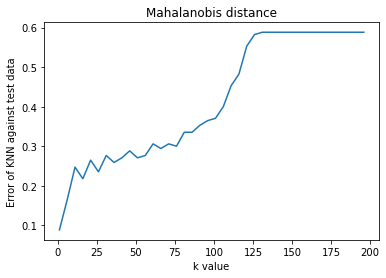

In [50]:
#part dii) Mahalanobis distance

XX = X_train.cov() #Compute the covariance of the matrix
YY = np.linalg.pinv(XX) #Compute the pseudoinverse of the covariance matrix

k_values_Dii = np.arange(1,201,5)
k_test_output_Dii = []
for Q in k_values_Dii:
    SpineKNN_Scan_Dii = KNeighborsClassifier(n_neighbors=Q, metric = 'mahalanobis', metric_params = {'V':XX, 'VI':YY})
    SpineKNN_Scan_Dii.fit(X_train,y_train)
    z = SpineKNN_Scan_Dii.score(X_test, y_test)
    k_test_output_Dii.append(z)
#print(k_test_output_Dii)
k_test_output_Dii = [1 - x for x in k_test_output_Dii]
plt.plot(k_values_Dii, k_test_output_Dii)
plt.title('Mahalanobis distance')
plt.xlabel("k value")
plt.ylabel("Error of KNN against test data")
#thus, k* = 1

|            | Manhattan |Chebyshev | Mahalanobis |
|------------|-----------|----------|-------------|
|   k*       |     1     |    1     |      1      |
| Test Error |    0.0647 |  0.07647 |   0.08823   |

Part e: Replacing majority polling with weighted decisions.

Text(0, 0.5, 'Error of KNN against test data')

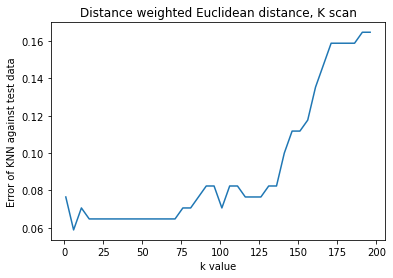

In [51]:
#Weighted Euclidean distance, p=2

k_values_e = np.arange(1,201,5)
k_test_output_ei = []
for Q in k_values_e:
    SpineKNN_Scan_ei = KNeighborsClassifier(n_neighbors=Q, weights='distance', p=2)
    SpineKNN_Scan_ei.fit(X_train,y_train)
    z = SpineKNN_Scan_ei.score(X_test, y_test)
    k_test_output_ei.append(z)

k_test_output_ei = [1 - x for x in k_test_output_ei]
plt.plot(k_values_e, k_test_output_ei)
plt.title('Distance weighted Euclidean distance, K scan')
plt.xlabel("k value")
plt.ylabel("Error of KNN against test data")


Text(0, 0.5, 'Error of KNN against test data')

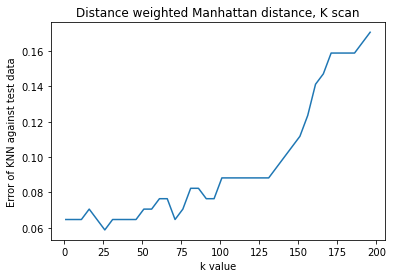

In [52]:
#Weighted Manhattan distance, p=1

k_values_e = np.arange(1,201,5)
k_test_output_eii = []
for Q in k_values_e:
    SpineKNN_Scan_eii = KNeighborsClassifier(n_neighbors=Q, weights='distance', p=1)
    SpineKNN_Scan_eii.fit(X_train,y_train)
    z = SpineKNN_Scan_eii.score(X_test, y_test)
    k_test_output_eii.append(z)

k_test_output_eii = [1 - x for x in k_test_output_eii]
plt.plot(k_values_e, k_test_output_eii)
plt.title('Distance weighted Manhattan distance, K scan')
plt.xlabel("k value")
plt.ylabel("Error of KNN against test data")


Text(0, 0.5, 'Error of KNN against test data')

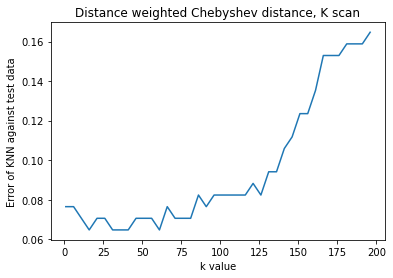

In [53]:
#Weighted Chebyshev distance, metric = chebyshev

k_values_e = np.arange(1,201,5)
k_test_output_eiii = []
for Q in k_values_e:
    SpineKNN_Scan_eiii = KNeighborsClassifier(n_neighbors=Q, weights='distance', metric = 'chebyshev')
    SpineKNN_Scan_eiii.fit(X_train,y_train)
    z = SpineKNN_Scan_eiii.score(X_test, y_test)
    k_test_output_eiii.append(z)

k_test_output_eiii = [1 - x for x in k_test_output_eiii]

plt.plot(k_values_e, k_test_output_eiii)
plt.title('Distance weighted Chebyshev distance, K scan')
plt.xlabel("k value")
plt.ylabel("Error of KNN against test data")

Part f) The lowest training error rate I achieved in this homework is 0.058823, achieved by the weighted Euclidean at k= 6 and also by the weighted Manhattan distance at k=26.